In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
from statistics import mean 
import csv

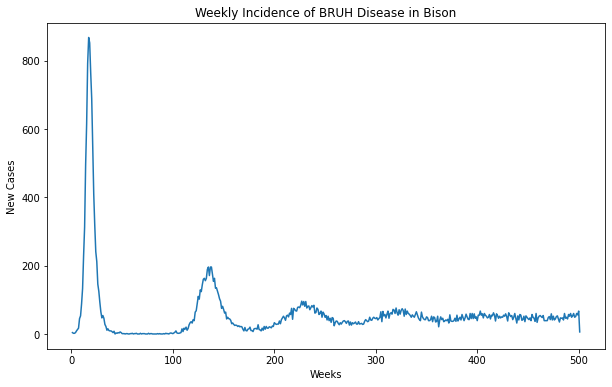

In [84]:
data = pd.read_csv("all_weeks.csv")
weeks = data['Week'].tolist()
cases = data['New Cases'].tolist()
plt.figure(figsize=(10, 6))
plt.plot(weeks, cases)
plt.title('Weekly Incidence of BRUH Disease in Bison')
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.show()

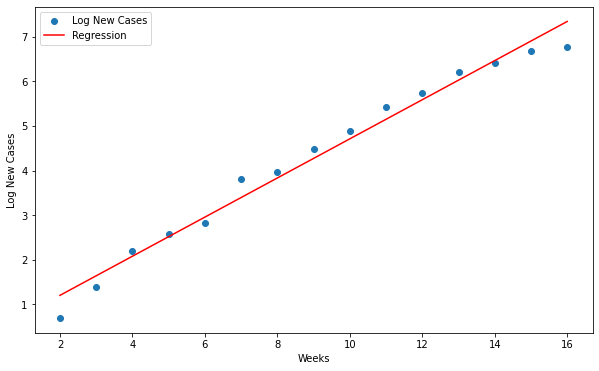

Slope: 0.43869457777621224


In [295]:
ln_cases = np.log(cases[:17])
slope, intercept, r_value, p_value, std_err = linregress(weeks[2:17], ln_cases[2:17])
ln_regress = []
for i in weeks[2:17]:
    ln_regress.append(slope * weeks[i] + intercept)

plt.figure(figsize=(10, 6))
plt.scatter(weeks[2:17], ln_cases[2:17], label='Log New Cases')
plt.plot(weeks[2:17], ln_regress, color='red', label='Regression')
plt.xlabel('Weeks')
plt.ylabel('Log New Cases')
plt.legend()
plt.show()

print("Slope:", slope)

In [293]:
R0 = 1 + (slope/(0.5 + 0.01)) # 1/2 + 1/100
print("Estimated R0:", R0)

Estimated R0: 1.860185446620024


In [294]:
CI_R0 = [1 + (slope - 1.96 * std_err) * 2, 1 + (slope + 1.96 * std_err) * 2]
print("95% Confidence Interval for R0:", CI_R0)

95% Confidence Interval for R0: [1.8079745892816543, 1.9468037218231946]


In [308]:
total = 1000 
antibodies = 517
infected = 7

prev = infected / total
seroprev = antibodies / total

std_err_sero = np.sqrt((seroprev * (1 - seroprev)) / total)
lower_sero = seroprev - 1.96 * std_err_sero
upper_sero = seroprev + 1.96 * std_err_sero

R0_sero = seroprev / (1 - seroprev)

lower_R0_sero = lower_sero / (1 - lower_sero)
upper_R0_sero = upper_sero / (1 - upper_sero)

print("Seroprevalence:", seroprev)
print("95% Confidence Interval for Seroprevalence:", (lower_sero, upper_sero))

print("R0 Estimate (Seroprevalence):", R0_sero)
print("95% Confidence Interval for R0 (Seroprevalence):",(lower_R0_sero, upper_R0_sero))


Seroprevalence: 0.517
95% Confidence Interval for Seroprevalence: (0.4860275965156077, 0.5479724034843924)
R0 Estimate (Seroprevalence): 1.0703933747412009
95% Confidence Interval for R0 (Seroprevalence): (0.9456297521436221, 1.2122543130294743)


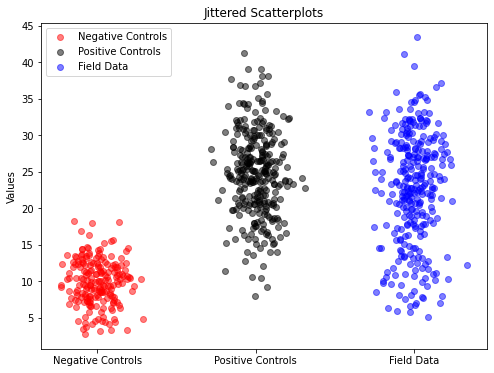

In [237]:
neg_data = pd.read_csv("HW4_Q3_neg.csv", header=None)
pos_data = pd.read_csv("HW4_Q3_pos.csv", header=None) 
field_data = pd.read_csv("HW4_Q3_data.csv",header=None)

neg_x = np.random.normal(loc=0, scale=0.1, size=len(neg))
pos_x = np.random.normal(loc=1, scale=0.1, size=len(pos))
field_x = np.random.normal(loc=2, scale=0.1, size=len(field))

plt.figure(figsize=(8, 6))
plt.scatter(neg_x, neg_data, color='red', alpha=0.5, label='Negative Controls')
plt.scatter(pos_x, pos_data, color='black', alpha=0.5, label='Positive Controls')
plt.scatter(field_x, field_data, color='blue', alpha=0.5, label='Field Data')

# Adjusting plot aesthetics
plt.xticks([0, 1, 2], ['Negative Controls', 'Positive Controls', 'Field Data'])
plt.ylabel('Values')
plt.title('Jittered Scatterplots')
plt.legend()
plt.show()


In [256]:
def se(c):
    true_pos = sum(i >= c for i in pos)
    return true_pos / len(pos)
    
def sp(c):
    true_neg = sum(i < c for i in neg)
    return true_neg / len(neg)

def raw_prev(c):
    n_pos = sum(i >= c for i in field)
    return n_pos / len(field)

def corrected_prev(c):
    return (raw_prev(c) - (1 - sp(c))) / (se(c) + sp(c) - 1)


In [284]:
pos = [i for row in pos_data.values for i in row]
neg = [i for row in neg_data.values for i in row]
field = [i for row in field_data.values for i in row]


values = np.unique(np.concatenate((pos, neg, field)))
youden = [se(c) + sp(c) - 1 for c in values]
optimal_c = values[np.argmax(youden)]

print("Optimal cutoff (Youden choice):", optimal_c)

Optimal cutoff (Youden choice): 14.786720403519933
